In [ ]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import mysql.dataadapter as dataAdapter
import matplotlib
from stock import Stock
sns.set_theme()


host is localhost
mysql connect success


Plot stock data

In [ ]:

text_kw = dict(ha="center", va="center", size=20)


def plotStock(prices_df):
    prices_df['Close'].plot(figsize=(15, 7), label='Close', c='black')
    prices_df['MA20'].plot(label='MA20', c='red', linestyle='dashed')
    prices_df['EMA20'].plot(label='EMA20', c='red')
    prices_df['MA60'].plot(label='MA60', c='orange', linestyle='dashed')
    prices_df['EMA60'].plot(label='EMA60', c='orange')
    prices_df['MA120'].plot(label='MA120', c='blue', linestyle='dashed')
    prices_df['EMA120'].plot(label='EMA120', c='blue')
    prices_df['MA250'].plot(label='MA250', c='green', linestyle='dashed')
    prices_df['EMA250'].plot(label='EMA250', c='green')
    prices_df['SumScore'].plot(label='Sumscore', c='yellow')
    plt.legend()


def plotSumScoreHeatMap(scoredf, ax):
    score = scoredf['SumScore'].to_numpy().reshape([1, len(scoredf)])
    sns.heatmap(score, vmin=0, vmax=100, cmap="RdYlGn", cbar=False, ax=ax, center=15, yticklabels=False,
                xticklabels=False,
                square=True, annot_kws={'rotation': 90})


def plotVolume(stockDF, ax):
    volume = stockDF.tail(20)['Volume']
    x_values = [str(x) for x in volume.index]
    ax.bar(x_values, volume.values)
    ax.axis('off')


def plotPrice(stockDF, ax):
    price = stockDF.tail(20)['Close']
    x_values = [str(x) for x in price.index]
    y = price.values
    ax.plot(x_values, y)
    x_index_max = np.argmax(y)
    x_index_min = np.argmin(y)
    ax.annotate('max', (x_index_max, y[x_index_max]), color='green')
    ax.annotate('min', (x_index_min, y[x_index_min]), color='red')
    ax.axis('off')


def plotText(text, ax, color='White'):
    kw = dict(text_kw)
    kw['backgroundcolor'] = color
    ax.text(0.5, 0.5, text, horizontalalignment='center',
            verticalalignment='center', **kw)
    ax.axis('off')


def plotStockList(stockList, tableTitle='Stock Table', time=None):
    if len(stockList) == 0:
        return

    title = ['Symbol', 'Price', 'Chg', '%Chg',
             'Price Line', 'Volume', 'Score Heat Map']
    f, ax = plt.subplots(nrows=len(stockList)+1, ncols=len(title), figsize=(20, 10), gridspec_kw={
                         'width_ratios': [2, 1, 1, 1, 3, 3, 5]})
    time = str(stockList[0].stockData.index[-1])[0:10]
    plt.suptitle(tableTitle+"  "+time, size=30)
    for i in range(len(title)):
        plotText(title[i], ax[0][i], 'Grey')
    for i in range(len(stockList)):
        color = 'Green' if stockList[i].stockData.iloc[-1]['Chg'] >= 0 else 'Red'
        plotText(stockList[i].label, ax[i+1][0])
        plotText(stockList[i].stockData.iloc[-1]['Close'], ax[i+1][1], color)
        plotText(stockList[i].stockData.iloc[-1]['Chg'], ax[i+1][2], color)
        plotText(stockList[i].stockData.iloc[-1]['%Chg'], ax[i+1][3], color)
        plotPrice(stockList[i].stockData, ax[i+1][4])
        plotVolume(stockList[i].stockData, ax[i+1][5])
        plotSumScoreHeatMap(stockList[i].stockData.tail(20), ax[i+1][-1])
    plt.show()


def plotMarkitData():
    adapter = dataAdapter.MarkitDataHelper()
    dfNAHY = pd.DataFrame(adapter.getCDX_NA_HY(), columns=[
                          'Name', 'Value', 'Date']).set_index('Date')
    dfNAIG = pd.DataFrame(adapter.getCDX_NA_IG(), columns=[
                          'Name', 'Value', 'Date']).set_index('Date')
    dfNAHY['Value'] = pd.to_numeric(dfNAHY.Value, errors='coerce')
    dfNAIG['Value'] = pd.to_numeric(dfNAIG.Value, errors='coerce')
    dfNAHY['Value'].plot(figsize=(15, 7), title='Markit Data ' +
                         str(dfNAHY.index[-1]), label='NA.HY')
    dfNAIG['Value'].plot(label='NA.IG')
    dfNAHYMean = dfNAHY['Value'].mean()
    dfNAIGMean = dfNAIG['Value'].mean()
    plt.hlines(
        dfNAIGMean, xmin=dfNAIG.index[0], xmax=dfNAIG.index[-1], colors='green')
    plt.hlines(
        dfNAHYMean, xmin=dfNAHY.index[0], xmax=dfNAHY.index[-1], colors='green')
    plt.legend()


Stock list

In [ ]:
holdingList = [
               Stock('SPLG'),
               Stock('GOOGL'),
               Stock('IPAY'),
               Stock('ISRG'),
               Stock('MSFT'),
               Stock('QQQ'),
               Stock('SMH'),
               Stock('TSLA'),
               Stock('VACQ'),
               Stock('XLC'),
               Stock('CSL.AX'),
               Stock('U'),
               Stock('ICLN'),
               ]

watchList = [
    Stock('ARKK'),
    Stock('ICLN'),
    Stock('SHOP'),
    Stock('SPY'),
    Stock('0700.HK')

]

giant = [

    Stock('AAPL'),
    Stock('AMZN'),
    Stock('ARKK'),
    Stock('DIS'),
    Stock('FB'),
    Stock('GOOG'),
    Stock('MSFT'),
    Stock('NFLX'),
    Stock('NVDA'),
    Stock('TSLA'),
    Stock('BRK-B'),
    Stock('V')
]


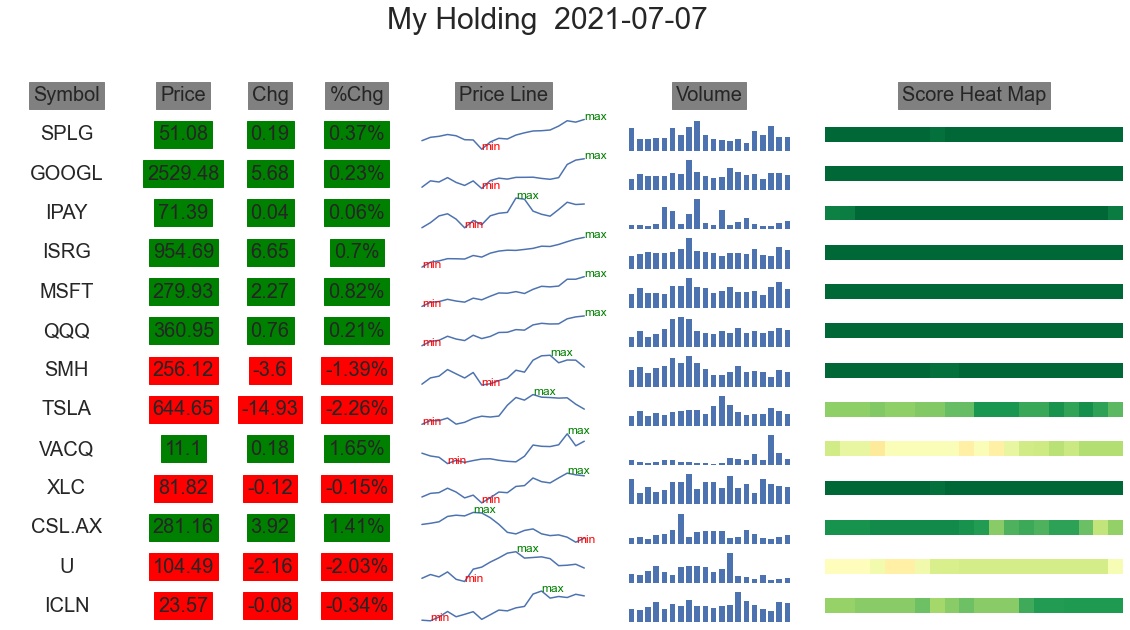

In [ ]:
plotStockList(holdingList, tableTitle='My Holding')


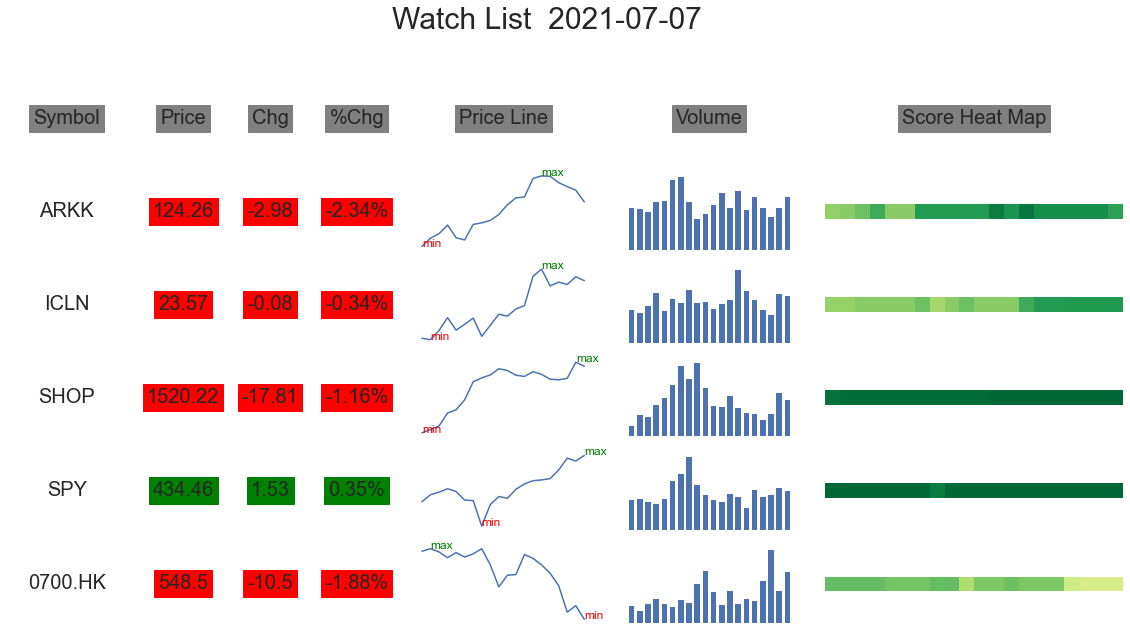

In [ ]:
plotStockList(watchList, tableTitle="Watch List")


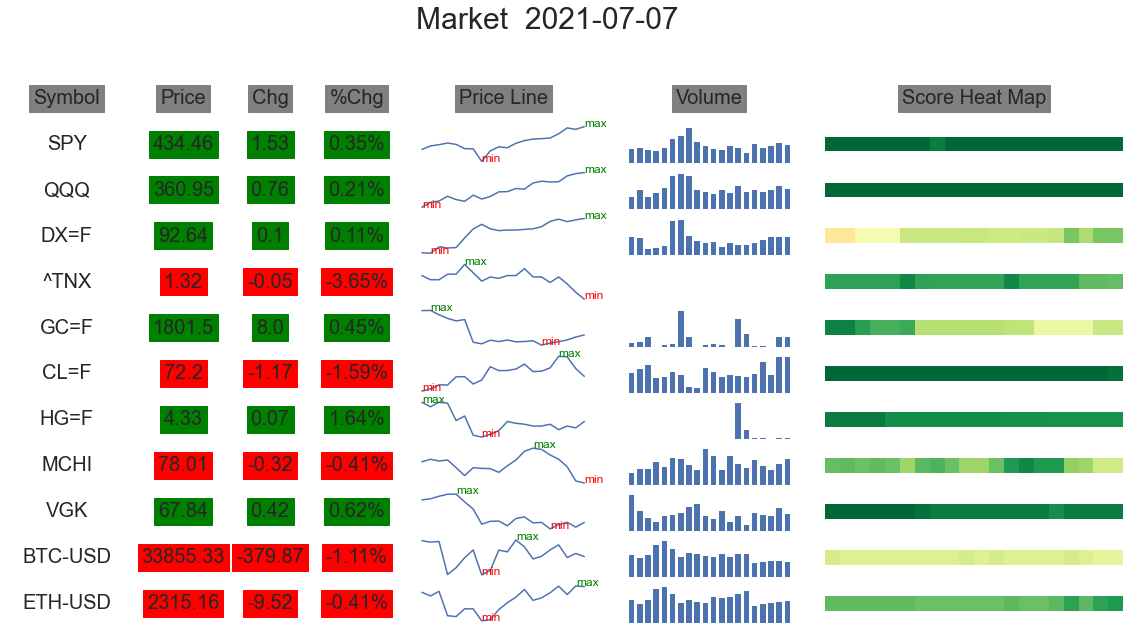

In [ ]:
market = [
    Stock('SPY'),
    Stock('QQQ'),
    Stock('DX=F'),
    Stock('^TNX'),
    Stock('GC=F'),  # Gold
    Stock('CL=F'),  # Oil
    Stock('HG=F'),  # Copper
    Stock('MCHI'),  # China
    Stock('VGK'),  # EUROP
    Stock('BTC-USD'),
    Stock('ETH-USD')
]
plotStockList(market, 'Market')


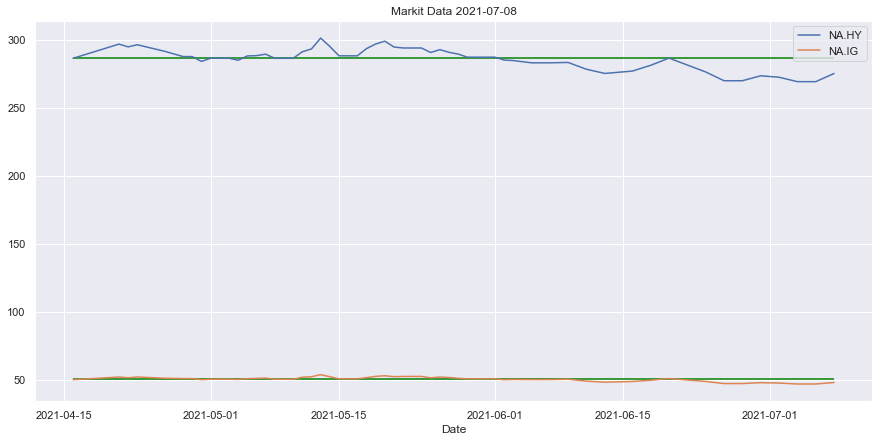

In [ ]:
adapter = dataAdapter.MarkitDataHelper()
dfNAHY = pd.DataFrame(adapter.getCDX_NA_HY(), columns=[
                      'Name', 'Value', 'Date']).set_index('Date')
dfNAIG = pd.DataFrame(adapter.getCDX_NA_IG(), columns=[
                      'Name', 'Value', 'Date']).set_index('Date')
dfNAHY['Value'] = pd.to_numeric(dfNAHY.Value, errors='coerce')
dfNAIG['Value'] = pd.to_numeric(dfNAIG.Value, errors='coerce')
dfNAHY['Value'].plot(figsize=(15, 7), title='Markit Data ' +
                     str(dfNAHY.index[-1]), label='NA.HY')
dfNAIG['Value'].plot(label='NA.IG')
dfNAHYMean = dfNAHY['Value'].mean()
dfNAIGMean = dfNAIG['Value'].mean()
plt.hlines(dfNAIGMean, xmin=dfNAIG.index[0],
           xmax=dfNAIG.index[-1], colors='green')
plt.hlines(dfNAHYMean, xmin=dfNAHY.index[0],
           xmax=dfNAHY.index[-1], colors='green')
plt.legend()


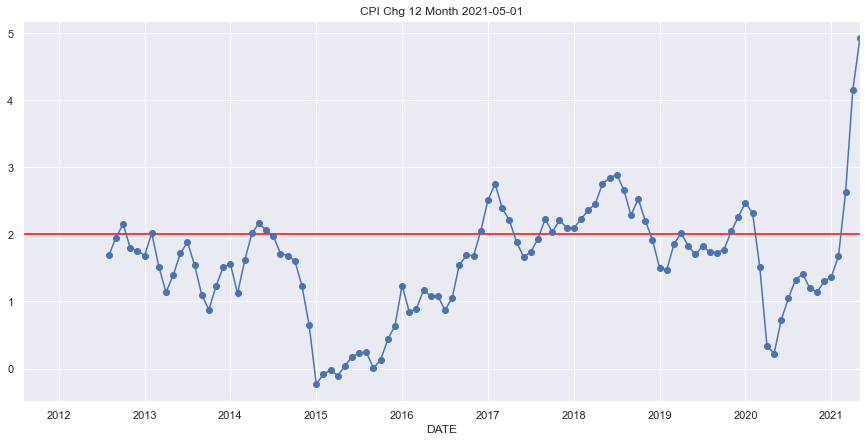

In [ ]:
end=datetime.date.today()
cpistart = end - datetime.timedelta(3650)
cpi = web.DataReader('CPIAUCSL', 'fred', cpistart, end)
cpi12 = [None]*12
cpilist = cpi['CPIAUCSL']
for i in range(12, len(cpi)):
    chg = (cpi.iloc[i]['CPIAUCSL']-cpi.iloc[i-12]
           ['CPIAUCSL'])*100/cpi.iloc[i-12]['CPIAUCSL']
    cpi12.append(chg)
cpi['Chg12'] = cpi12
cpi['Chg12'].plot(figsize=(15, 7), title='CPI Chg 12 Month ' +
                  str(cpi.index[-1])[0:10], marker='o')
plt.hlines(2, cpi.index[0], cpi.index[-1], colors='red')


Text(2019-08-28 00:00:00, [3759946.], 'min')

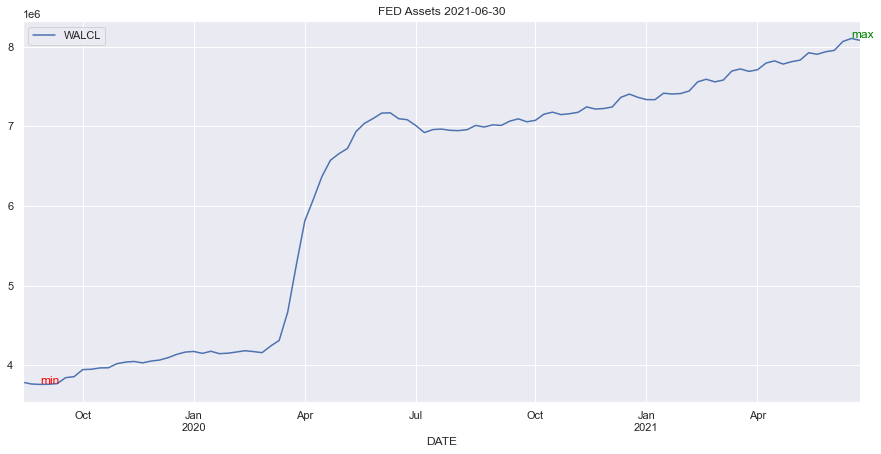

In [ ]:
fedAssets = web.DataReader('WALCL', 'fred', end-datetime.timedelta(700), end)
fedAssets.plot(figsize=(15, 7), title='FED Assets ' +
               str(fedAssets.index[-1])[0:10])

x_index_max = np.argmax(fedAssets.values)
x_index_min = np.argmin(fedAssets.values)
plt.annotate('max', (fedAssets.index[x_index_max],
             fedAssets.values[x_index_max]), color='green')
plt.annotate('min', (fedAssets.index[x_index_min],
             fedAssets.values[x_index_min]), color='red')


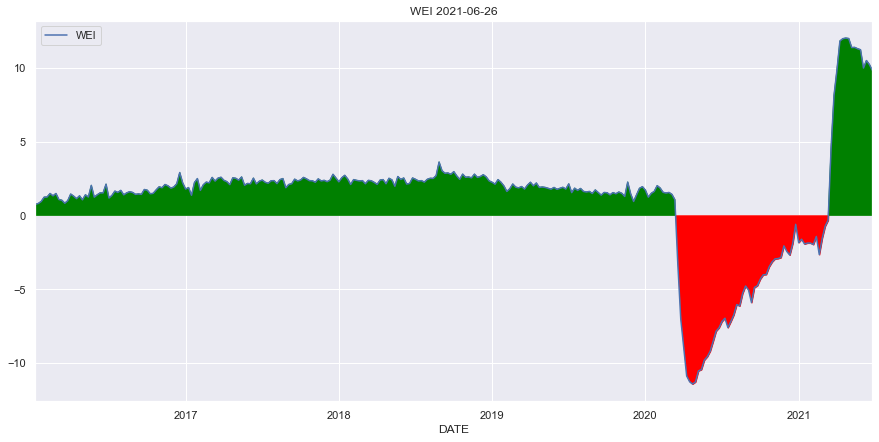

In [ ]:
WEI = web.DataReader('WEI', 'fred', end-datetime.timedelta(2000), end)
WEI.plot(figsize=(15, 7), title='WEI ' +
         str(WEI.index[-1])[0:10])
plt.fill_between(
    WEI.index, 0, WEI['WEI'], where=WEI['WEI'] > 0, interpolate=True, color='green')
plt.fill_between(
    WEI.index, 0, WEI['WEI'], where=WEI['WEI'] < 0, interpolate=True, color='red')


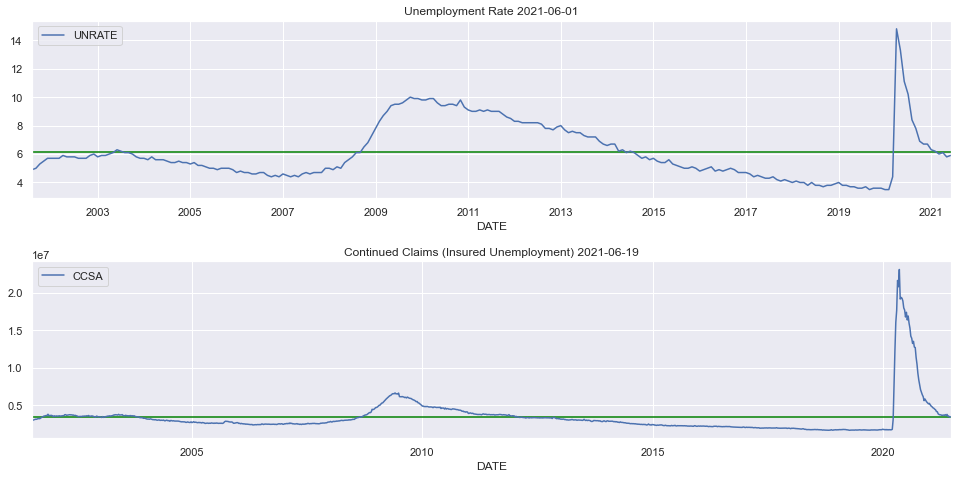

In [ ]:
fig, ax = plt.subplots(2, 1)
fig.tight_layout()
unrat = web.DataReader('UNRATE', 'fred', end-datetime.timedelta(7300), end)
unrat.plot(figsize=(15, 7), title='Unemployment Rate ' +
           str(unrat.index[-1])[0:10], ax=ax[0])
ax[0].hlines(unrat['UNRATE'].mean(), unrat.index[0],
             unrat.index[-1], colors='green')

ccsa = web.DataReader('CCSA', 'fred', end-datetime.timedelta(7300), end)
ccsa.plot(figsize=(15, 7), title='Continued Claims (Insured Unemployment) ' +
          str(ccsa.index[-1])[0:10], ax=ax[1])
ax[1].hlines(ccsa['CCSA'].mean(), ccsa.index[0],
             ccsa.index[-1], colors='green')


<AxesSubplot:title={'center':'RRPONTSYD2021-07-07'}, xlabel='DATE'>

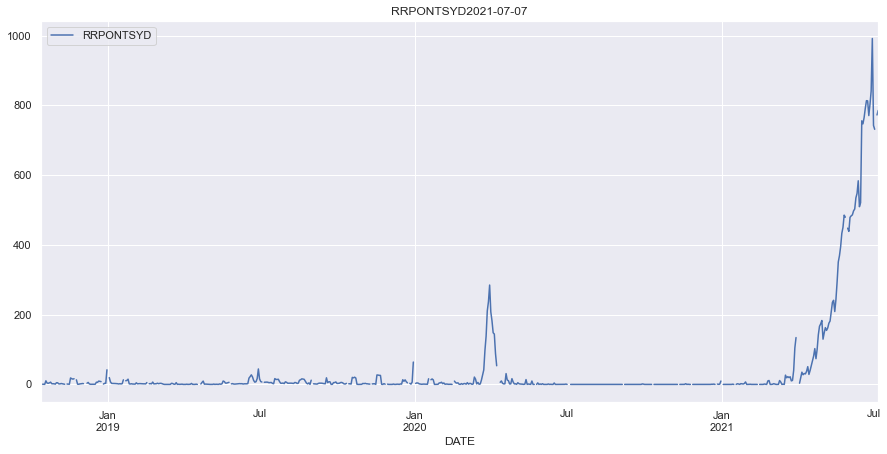

In [ ]:
#逆回购
RRPONTSYD = web.DataReader('RRPONTSYD', 'fred', end-datetime.timedelta(1000), end)
RRPONTSYD.plot(figsize=(15, 7), title='RRPONTSYD' +
         str(RRPONTSYD.index[-1])[0:10])



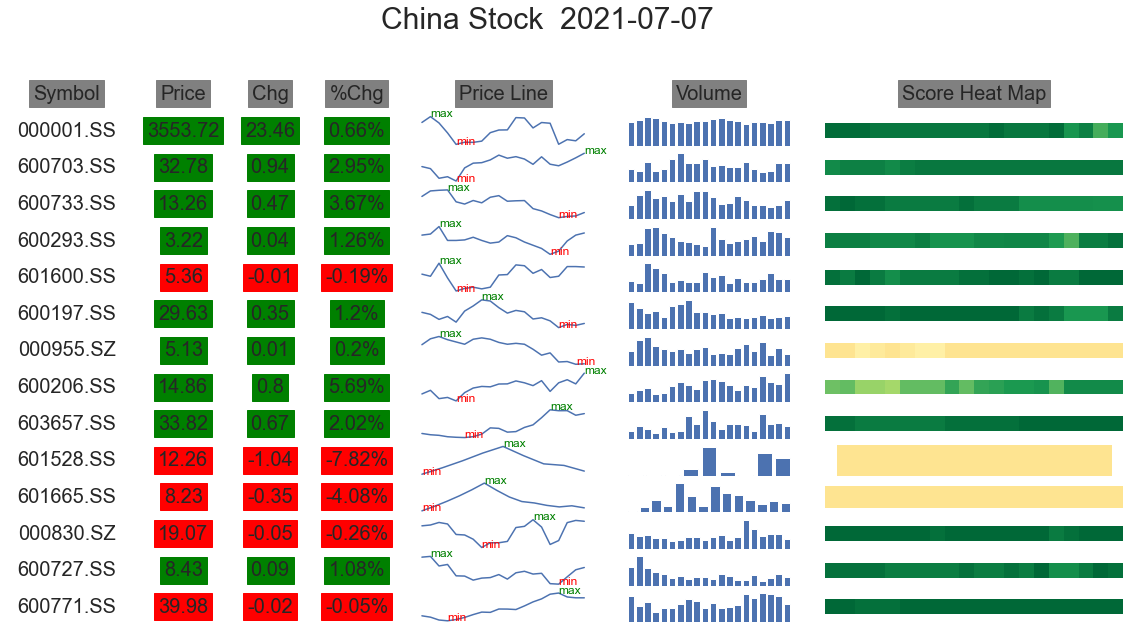

In [ ]:
ChinaStock = [
    Stock('000001.SS'),
    Stock('600703.SS'),
    Stock('600733.SS'),
    Stock('600293.SS'),
    Stock('601600.SS'),
    Stock('600197.SS'),
    Stock('000955.SZ'),
    Stock('600206.SS'),
    Stock('603657.SS'),
    Stock('601528.SS'),
    Stock('601665.SS'),
    Stock('000830.SZ'),
    Stock('600727.SS'),
    Stock('600771.SS'),

]

plotStockList(ChinaStock, 'China Stock')


In [ ]:
tnx=Stock('^TNX')
tnx.stockData.tail()

,Close,Volume,MA20,MA60,MA120,MA250,EMA20,EMA60,EMA120,EMA250,MAScore,PriceScore,SumScore,Chg,%Chg
Date,,,,,,,,,,,,,,,
2021-06-30,1.44,0.0,1.5045,1.575167,1.472083,1.09976,1.507920,1.530047,1.435223,1.315691,95.238095,70.0,77.571429,-0.04,-2.7%
2021-07-01,1.48,0.0,1.4975,1.572333,1.475250,1.10296,1.505261,1.528406,1.435963,1.317000,95.238095,70.0,77.571429,0.04,2.78%
2021-07-02,1.43,0.0,1.4910,1.569000,1.477750,1.10600,1.498093,1.525180,1.435865,1.317901,95.238095,55.0,67.071429,-0.05,-3.38%
2021-07-06,1.37,0.0,1.4810,1.564000,1.479667,1.10876,1.485894,1.520092,1.434776,1.318316,95.238095,55.0,67.071429,-0.06,-4.2%
2021-07-07,1.32,0.0,1.4705,1.558000,1.481583,1.11144,1.470094,1.513532,1.432879,1.318329,90.476190,55.0,65.642857,-0.05,-3.65%
